In [8]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

RANDOM_SEED = 2023

mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')


X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## What's the shape of the data

Here MNIST is a set of 70,000 images each 28 X 28 pixels.

The target labels (y) are the actual number that each image represents.

In [9]:
print(X)
print(X.shape)
print(y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(70000, 784)
(70000,)


## View one digit of the set

1. Grab one of the records, each one being an image
2. Reshape it to 28 x 28
3. Plot using `plt.imshow()`

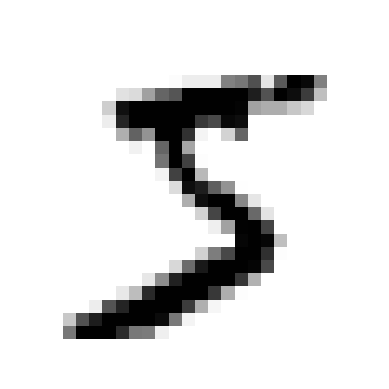

The image label: 5


In [10]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

some_digit = X[0] # first image
plot_digit(some_digit)
plt.show()

print(f'The image label: {y[0]}')

## Now split the data into train and test sets
This set is already pre-shuffled and split into training sets (first 60000) and test sets (10000)


In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Try SVC for multi_classification

SVC natively handles binary classification

If fed a multiclass data set it uses the one-vs-one scheme

In [12]:
svm_clf = SVC(random_state=RANDOM_SEED)
svm_clf.fit(X_train[:2000], y_train[:2000])

some_digit_pred = svm_clf.predict([some_digit])
print(some_digit_pred)

['5']


### SVC scores

The model returns one score for each class, in this case 10

We can see the classes that the model is trained on, and the corresponding scores for our '5' digit

The score for the 5th class is 9.3 which is the highest

In [13]:
print(svm_clf.classes_)

some_digit_scores = print(svm_clf.decision_function([some_digit]))
print(some_digit_scores)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
[[ 3.79297828  0.72949369  6.06184129  8.29800527 -0.29383983  9.30157597
   1.74723215  2.77365456  7.20601456  4.82245092]]
None
